In [1]:
from statsmodels.tsa.arima.model import ARIMA
import sys

sys.path.append("../..")

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gp
import seaborn as sns

import src.datasets.loading.ookla
import src.datasets.loading.statcan
import src.datasets.joins

from src.config import DATA_DIRECTORY

In [2]:
das_info = gp.read_file(DATA_DIRECTORY / "hackathon" / "geometry.gpkg", driver="GPKG")
speed_data = pd.read_csv(DATA_DIRECTORY / "hackathon" / "speeds.csv")
speed_data.DAUID = speed_data.DAUID.astype(str)

In [3]:
full_data = pd.merge(das_info, speed_data)
full_data["date"] = pd.to_datetime(
    full_data["year"].astype(str)
    + "-"
    + ((full_data["quarter"] - 1) * 3 + 1).astype(str)
    + "-01"
)

In [7]:
print(full_data.head(5))
# print(das_info.head(5))

      DAUID PRUID                                             PRNAME CDUID  \
0  10010244    10  Newfoundland and Labrador / Terre-Neuve-et-Lab...  1001   
1  10010244    10  Newfoundland and Labrador / Terre-Neuve-et-Lab...  1001   
2  10010244    10  Newfoundland and Labrador / Terre-Neuve-et-Lab...  1001   
3  10010244    10  Newfoundland and Labrador / Terre-Neuve-et-Lab...  1001   
4  10010244    10  Newfoundland and Labrador / Terre-Neuve-et-Lab...  1001   

            CDNAME CDTYPE   CCSUID     CCSNAME   CSDUID     CSDNAME  ...  \
0  Division No.  1    CDR  1001519  St. John's  1001519  St. John's  ...   
1  Division No.  1    CDR  1001519  St. John's  1001519  St. John's  ...   
2  Division No.  1    CDR  1001519  St. John's  1001519  St. John's  ...   
3  Division No.  1    CDR  1001519  St. John's  1001519  St. John's  ...   
4  Division No.  1    CDR  1001519  St. John's  1001519  St. John's  ...   

                                            geometry  year quarter conn_ty

In [20]:
selected_data = full_data[['DAUID', 'PRUID','CDUID','CCSUID','CSDUID','ERUID','SACCODE','CMAUID','PCUID','PCCLASS','CENSUS_YEAR','Pop_2021','Private_Dwellings','Pop_density_square_km',
                          'Land_area_square_km','Income_count_total','Median_income','After-tax_income','Mean_income','After-tax_mean_income','Median_household_income','Indigenous_identity_count_total',
                          'quarter', 'conn_type','tests','date', 'devices','avg_d_kbps']]
train_data = selected_data['2019-01-01':'2022-12-31']
test_data = selected_data['2023-01-01':]

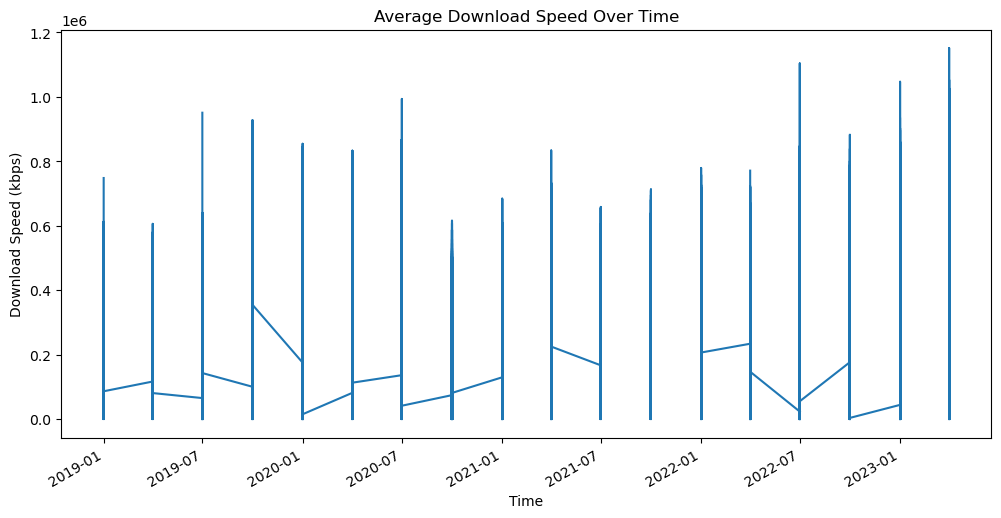

In [16]:
selected_data.set_index('date', inplace=True)
selected_data['avg_d_kbps'].plot(figsize=(12, 6))
plt.title('Average Download Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Download Speed (kbps)')
plt.show()

In [21]:
print(selected_data[['date']])

              date
0       2019-01-01
1       2019-01-01
2       2019-04-01
3       2019-04-01
4       2019-07-01
...            ...
2263555 2023-04-01
2263556 2023-07-01
2263557 2023-07-01
2263558 2023-10-01
2263559 2023-10-01

[2263560 rows x 1 columns]


In [ ]:
train_data = selected_data['2019-01-01':'2022-12-31']
test_data = selected_data['2023-01-01':]